In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['axes.grid'] = False
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [12]:
import numpy as np
import pickle

In [13]:
k_best = 504
l_best = 495
n_best = 5
with open(f'df_PE_ZS{l_best}_offset{n_best}_FRet{k_best}.pkl', 'rb') as file:
    best_c = pickle.load(file)

In [14]:
best_c.dropna()

,P/E,Close,PE_ZS_offset,FRet
Date,,,,
2002-01-02,15.37,1060.75,1.069970,0.802734
2002-01-03,15.54,1072.25,1.118457,0.814922
2002-01-04,15.89,1096.20,1.065063,0.783434
2002-01-07,15.94,1100.15,0.968884,0.751307
2002-01-08,16.09,1109.90,0.980568,0.726957
...,...,...,...,...
2020-05-06,21.34,9270.90,2.715098,0.702332
2020-05-07,21.18,9199.05,2.391954,0.722167
2020-05-08,21.28,9251.50,2.053244,0.757477


<AxesSubplot:xlabel='Date'>

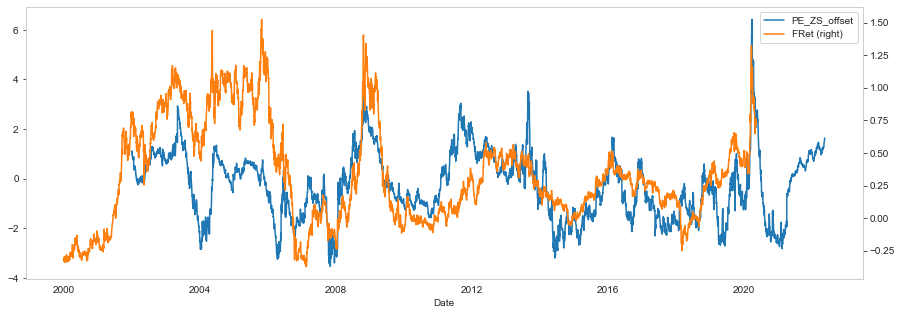

In [19]:
best_c[["PE_ZS_offset", "FRet"]].plot(secondary_y="FRet")

In [18]:
# Readying the data --best_c here refers to the dataframe from the pickle file I sent over
test_start_dt = best_c.loc[best_c.FRet.isna()].index[0]
test_end_dt = best_c.loc[best_c.FRet.isna()].index[-1]
train_start_dt = best_c.loc[best_c.PE_ZS_offset.isna()].index[-1]


In [23]:
# Creating Train-Test set
train_set = best_c.loc[(best_c.index>train_start_dt) & (best_c.index<test_start_dt)]
test_set = best_c.loc[(best_c.index>=test_start_dt) & (best_c.index<=test_end_dt)]

coefficient of determination: 1.0
intercept: 0.41553822927060596
slope: [0.14429074]


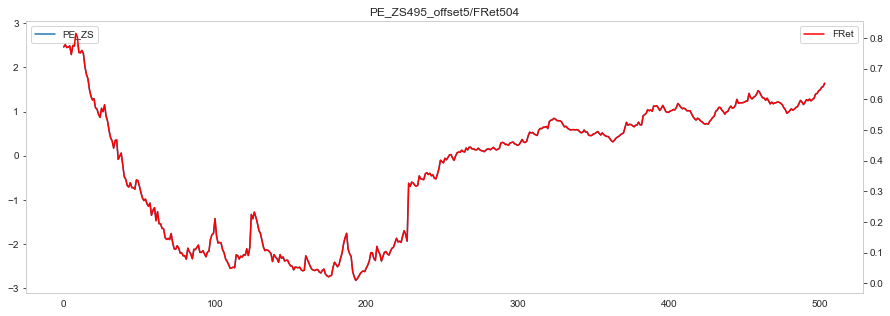

In [32]:
# Creating arrays
X_train = np.array(train_set['PE_ZS_offset']).reshape(-1,1)
Y_train = np.array(train_set['FRet'])
X_test = np.array(test_set['PE_ZS_offset']).reshape(-1,1)

# Ready a linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
print(f"coefficient of determination: {model.score(X_train, Y_train)}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

# Predict and replace the prediction inside NaN values of test set
y_pred = model.predict(X_test)
test_df = test_set.copy()
test_df['FRet'] = y_pred

# Plot
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(test_df[f'PE_ZS_offset'].values, label='PE_ZS')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(test_df[f'FRet'].values, color='red', label='FRet')
ax2.legend()
ax2.title.set_text(f'PE_ZS{l_best}_offset{n_best}/FRet{k_best}')

In [34]:
test_set['PE_ZS_offset']*0.14429074+0.41553822927060596

Date
2020-05-13    0.770520
2020-05-14    0.777976
2020-05-15    0.768596
2020-05-18    0.770279
2020-05-19    0.773755
                ...   
2022-05-13    0.627333
2022-05-16    0.630691
2022-05-17    0.638789
2022-05-18    0.641160
2022-05-19    0.652255
Name: PE_ZS_offset, Length: 504, dtype: float64